## Cardiovascular risk

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

from sklearn.metrics import roc_auc_score,auc,roc_curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [3]:
#importing the data set 
df = pd.read_csv('data_cardiovascular_risk.csv')

### Preliminary data evaluation

In [4]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
print(f'The number of rows and columns: {df.shape}')

The number of rows and columns: (3390, 17)


In [7]:
print(f" Number of categorical features {df.select_dtypes(include = 'object').shape[1]}")
print(f" Number of numerical features {df.select_dtypes(exclude  = 'object').shape[1]}")

 Number of categorical features 2
 Number of numerical features 15


In [8]:
#checking for missing values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
#Checking for duplicated values
df.duplicated().sum()

0

In [10]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

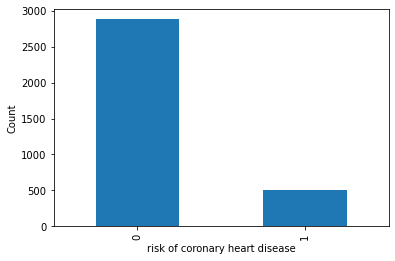

In [11]:
#Checking tagget variable
df['TenYearCHD'].value_counts().plot(kind = 'bar')
plt.xlabel('risk of coronary heart disease')
plt.ylabel('Count')
plt.show()

Summary
* data contains 17 Columns and 3390 rows
* In which id coulmn can be droped 
* So there are 16 independent variables (age,education,sex, is_smoking, cigsPerDay,BPMeds,
    prevalentStroke, prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI, heartRate, glucose)
* TenYearCHD is the dependent variable  “1”, means “Yes”, “0” means “No”
* There are missing values in the data set
* There are no duplicated values 
* There are 2 categorical features and 14 numerical features
* As per preliminary obsevation data set is highly imbalaced as Cardioissues yes is very less compared to caridio issues no

### Handling missing values

In [12]:
#Education

#1 - Higher Secorndary, 
#2- Graduate, 
#3 - Post Graduate
#4- Doctarte or PHD


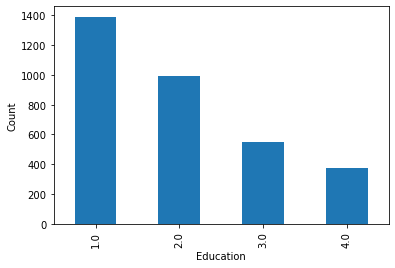

In [13]:
df['education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [14]:
df['education'].mode()[0]

1.0

In [15]:
#Filling missing values in the education with mode value of eduction
#Even though the values have dtype float , it can be considered as categorical value , So the mode is selected 

In [16]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [17]:
#There are 22  missing values in the cigarettes per day value
#cigsPerDay :the number of cigarettes that the person smoked on average in one day 

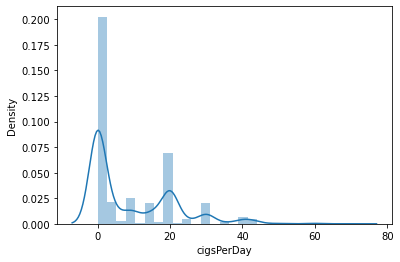

In [18]:
sns.distplot(df['cigsPerDay'])
plt.show()

<AxesSubplot:xlabel='cigsPerDay'>

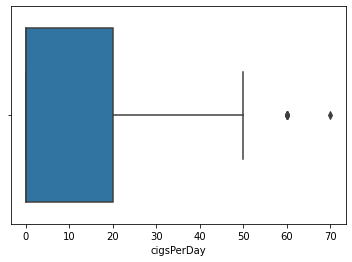

In [19]:
sns.boxplot(df['cigsPerDay'])

In [20]:
df[df['cigsPerDay']>50]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
42,42,39,1.0,M,YES,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.0,0
76,76,37,4.0,M,YES,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.0,0
482,482,49,2.0,M,YES,60.0,0.0,0,0,0,213.0,123.0,75.0,24.84,70.0,NaN,1
869,869,58,2.0,M,YES,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.0,0
1774,1774,46,1.0,M,YES,60.0,0.0,0,0,0,285.0,121.0,82.0,27.62,70.0,79.0,0
2075,2075,59,1.0,M,YES,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.0,0
2222,2222,48,1.0,M,YES,60.0,0.0,0,0,0,232.0,136.0,81.0,25.83,80.0,78.0,0
2985,2985,40,3.0,M,YES,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.0,0
3374,3374,67,2.0,M,YES,60.0,0.0,0,1,0,261.0,170.0,100.0,22.71,72.0,79.0,1


In [21]:
#we could consider 60 and 70 as outliers , But if we consider 17 hours a day (7 hours sleeping ), It is 4 cigarettes per hours ,
#There are chances for that it will be rare.
#So not removing ths values, and considring median for filling na values 

In [22]:
print(f'Median of cigarettes per day :{df.cigsPerDay.median()}')

Median of cigarettes per day :0.0


In [23]:
df['cigsPerDay'] =  df['cigsPerDay'].fillna(0.0)

In [24]:
# BPMeds -  whether or not the patient was on blood pressure medication (Nominal) 
#BPMeds has 44 missing values

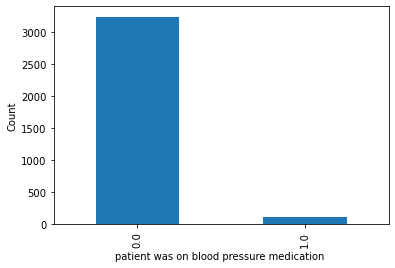

In [25]:
df['BPMeds'].value_counts().plot(kind='bar')
plt.xlabel('patient was on blood pressure medication ')
plt.ylabel('Count')
plt.show()

In [26]:
#Filling the missing values with mode 
df['BPMeds'].mode()

0    0.0
Name: BPMeds, dtype: float64

In [27]:
df['BPMeds'] = df['BPMeds'].fillna(0.0)

In [28]:
#Tot Chol: total cholesterol level (Continuous) 
#there are 38 missing values
#checking for outliers

In [29]:
df['totChol'].mean()

237.07428400954655

In [30]:
df['totChol'].mode()[0]

240.0

<AxesSubplot:xlabel='totChol', ylabel='Density'>

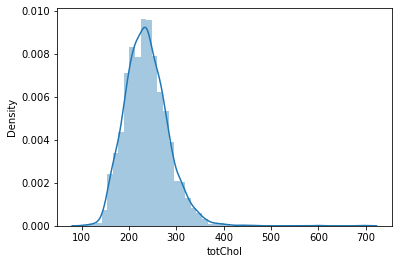

In [31]:
sns.distplot(df['totChol'])

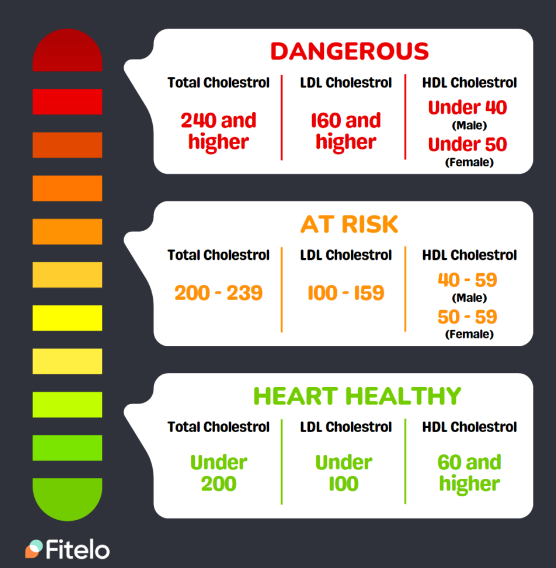

<AxesSubplot:xlabel='totChol'>

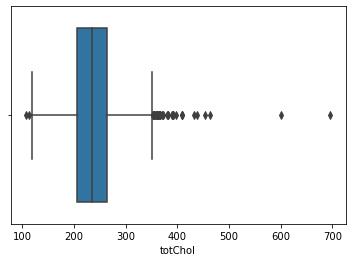

In [32]:
sns.boxplot(df['totChol'])

In [33]:
#values above 500 is considered as outliers
df[df['totChol']>500]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
423,423,52,2.0,F,NO,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
512,512,51,1.0,M,YES,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


In [34]:
#droping rows with outliers
df = df.drop([423,512])

In [35]:
df['totChol'].mean()

236.8289552238806

In [36]:
df['totChol'].mode()[0]

240.0

In [37]:
#replacing missing values with mode
df['totChol'] = df['totChol'].fillna(240)

In [38]:
#BMI: Body Mass Index (Continuous) 

<AxesSubplot:xlabel='BMI', ylabel='Density'>

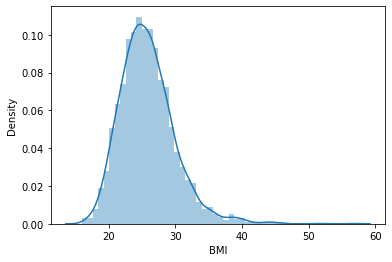

In [39]:
sns.distplot(df['BMI'])

<AxesSubplot:xlabel='BMI'>

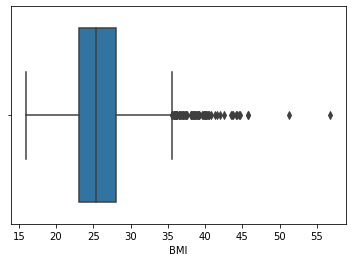

In [40]:
sns.boxplot(df['BMI'])

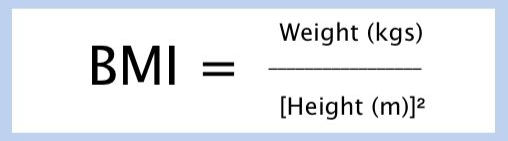

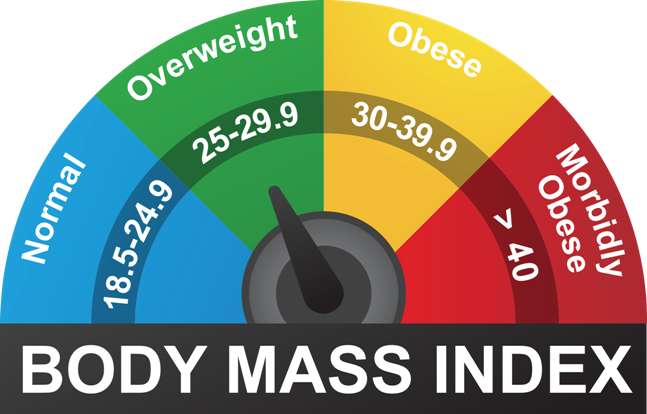

In [41]:
df['BMI'].mean()

25.794632483698834

In [42]:
df['BMI'].mode()[0]

22.91

In [43]:
#Values are in expected range and no outliers
#missing values are replaced with mode

In [44]:
df['BMI'] = df['BMI'].fillna(22.91)

In [45]:
#heart rate 

<AxesSubplot:xlabel='heartRate', ylabel='Density'>

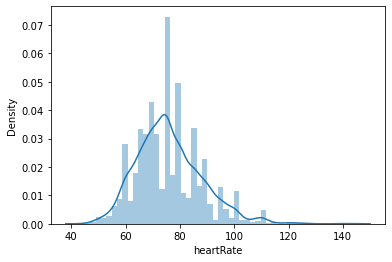

In [46]:
sns.distplot(df['heartRate'])

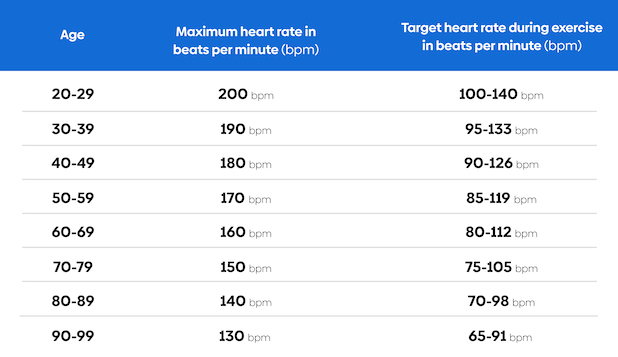


<AxesSubplot:xlabel='heartRate'>

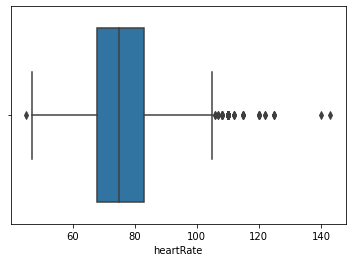

In [47]:
sns.boxplot(df['heartRate'])

In [48]:
#values looks normal and no outlier is identified 

In [49]:
df['heartRate'].mean()

75.97106583997638

In [50]:
df['heartRate'].mode()[0]

75.0

In [51]:
#replacing missing value with mean value

In [52]:
df['heartRate'] = df['heartRate'].fillna(75.97)

In [53]:
#Glucose 

<AxesSubplot:xlabel='glucose', ylabel='Density'>

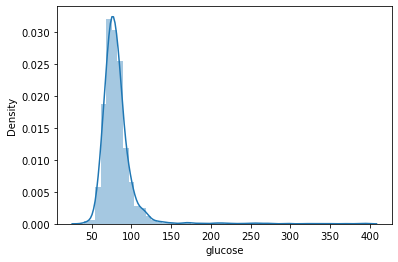

In [54]:
sns.distplot(df['glucose'])

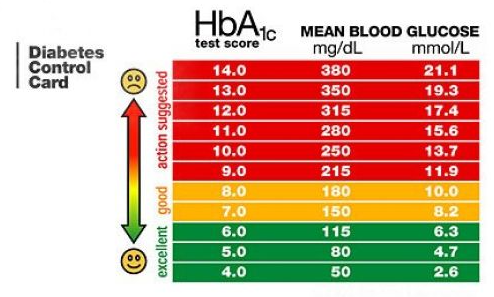

<AxesSubplot:xlabel='glucose'>

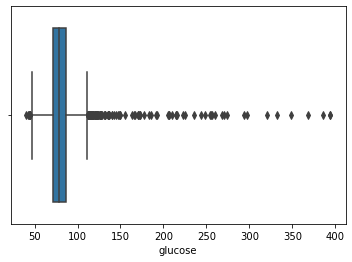

In [55]:
sns.boxplot(df['glucose'])

In [56]:
#contains no outliers , values are as per the chart
#Using mode to fill the missing values

In [57]:
df['glucose'].mode()[0]

75.0

In [58]:
df['glucose'] = df['glucose'].fillna(75.0)

### Exploratory data analysis

In [59]:
#id can be droped 

df = df.drop(columns='id',axis=1)

In [60]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3388.0,NaN,NaN,NaN,49.541027,8.595274,32.0,42.0,49.0,56.0,70.0
education,3388.0,NaN,NaN,NaN,1.946281,1.017738,1.0,1.0,2.0,3.0,4.0
sex,3388,2,F,1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3388,2,NO,1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3388.0,NaN,NaN,NaN,9.013282,11.86533,0.0,0.0,0.0,20.0,70.0
BPMeds,3388.0,NaN,NaN,NaN,0.029516,0.169273,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3388.0,NaN,NaN,NaN,0.006494,0.080332,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3388.0,NaN,NaN,NaN,0.314935,0.464559,0.0,0.0,0.0,1.0,1.0
diabetes,3388.0,NaN,NaN,NaN,0.025384,0.157311,0.0,0.0,0.0,0.0,1.0
totChol,3388.0,NaN,NaN,NaN,236.864522,43.869693,107.0,206.0,235.0,263.25,464.0


In [61]:
df_object = df.select_dtypes(include='object')
df_numeric = df.select_dtypes(exclude='object')

In [62]:
df_numeric.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [63]:
for i in df_numeric.columns:
    print(f'**********{i}************')
    print(df_numeric[i].value_counts())
    print('\n')
    

**********age************
40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    117
55    116
50    115
53    114
51    113
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64


**********education************
1.0    1477
2.0     989
3.0     549
4.0     373
Name: education, dtype: int64


**********cigsPerDay************
0.0     1724
20.0     606
30.0     176
15.0     172
10.0     106
9.0      103
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0      

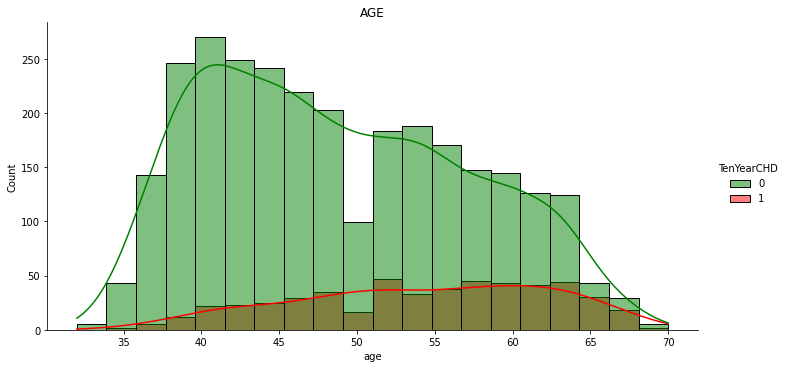

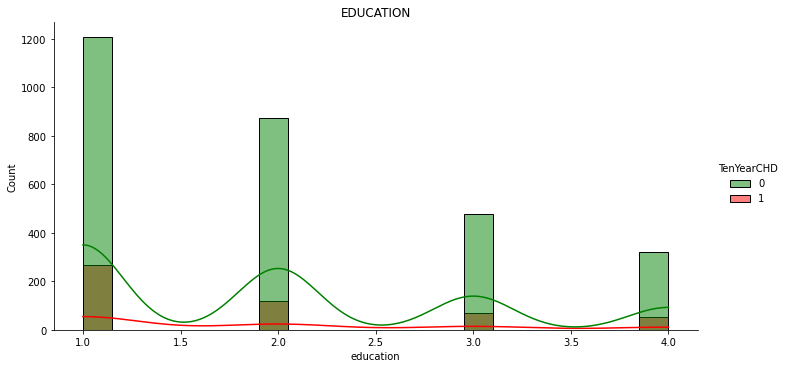

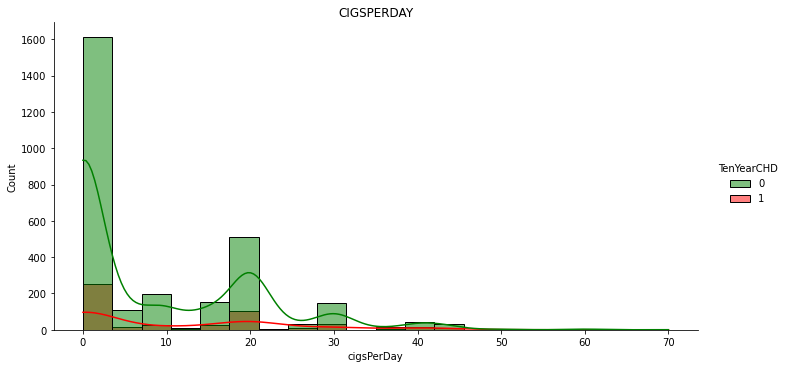

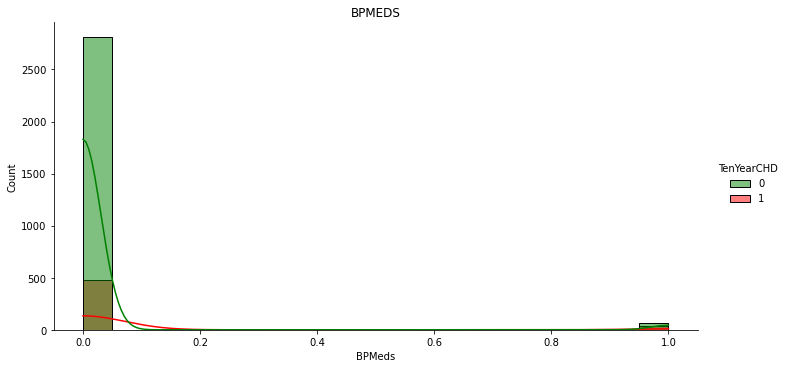

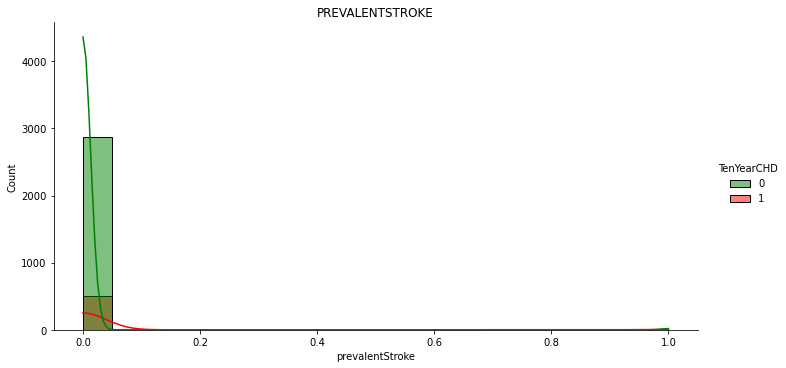

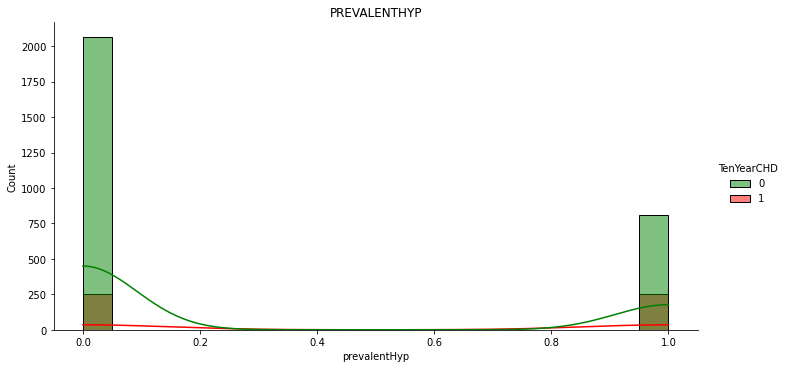

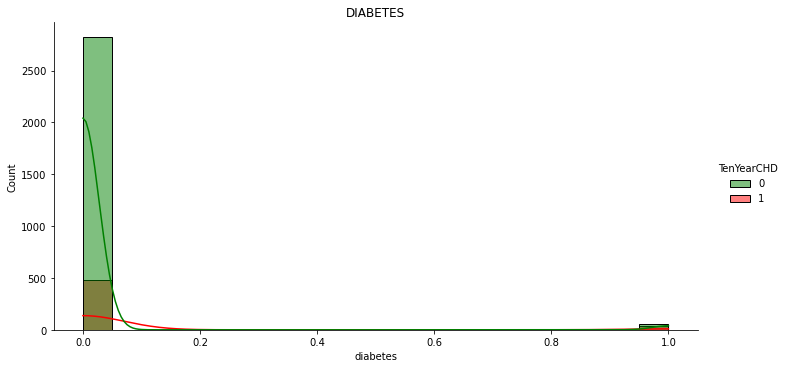

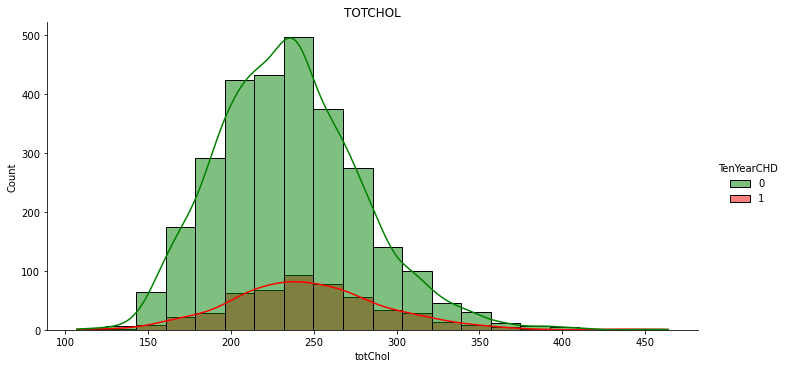

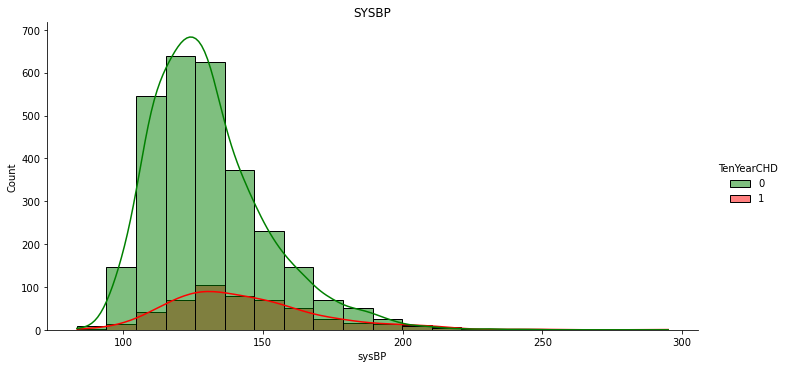

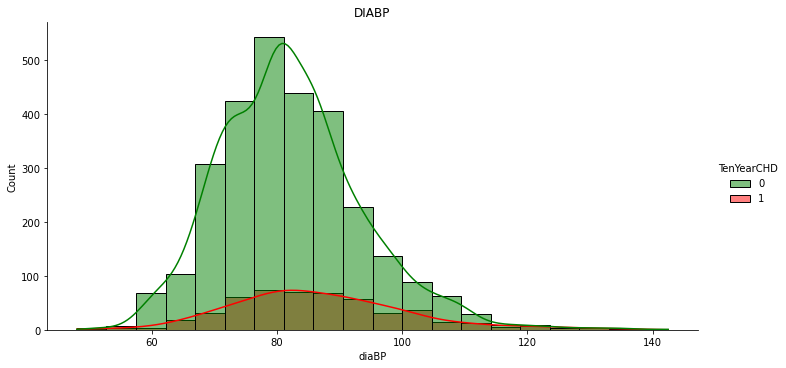

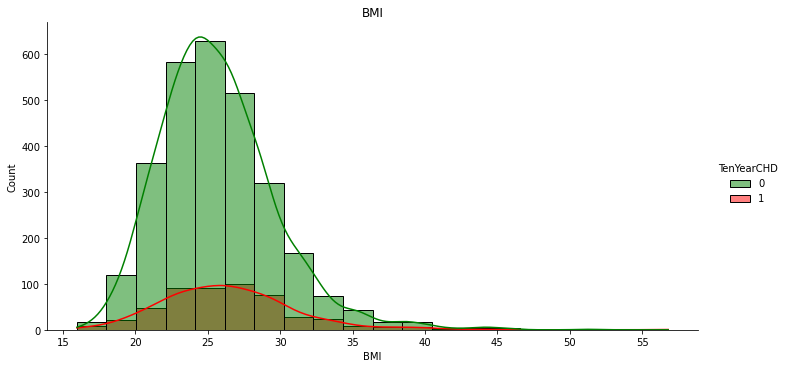

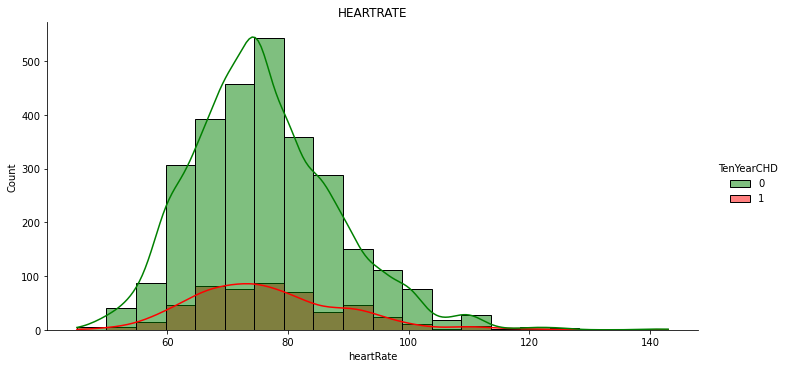

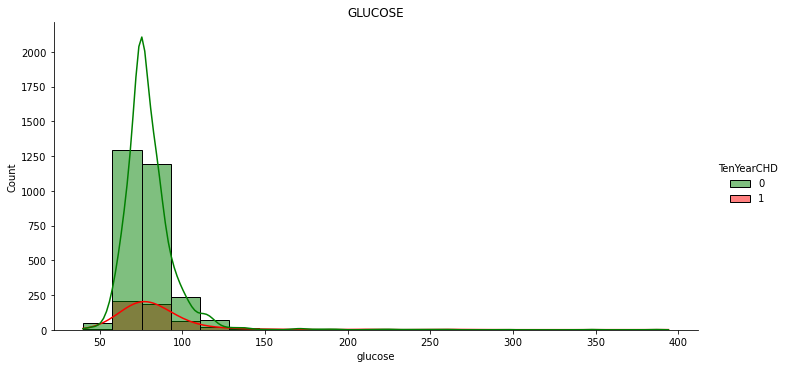

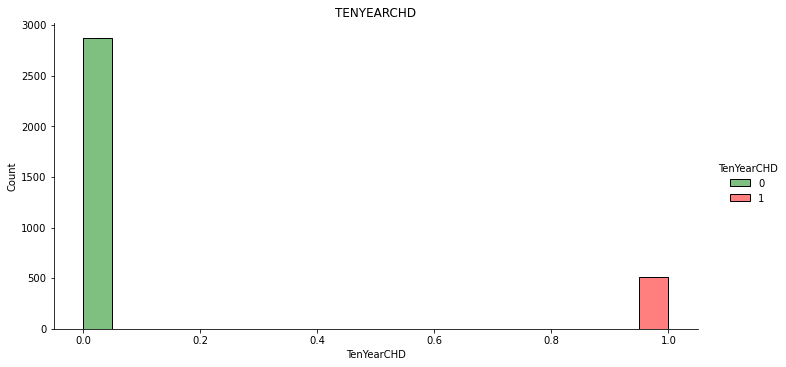

In [64]:
custom_palette = ["green","red"]
sns.set_palette(custom_palette)
for i in df_numeric.columns:
    sns.displot(data = df_numeric,x =df_numeric[i],kde=True,bins = 20,aspect=2,hue='TenYearCHD')
    plt.title((i).upper())
    plt.show()

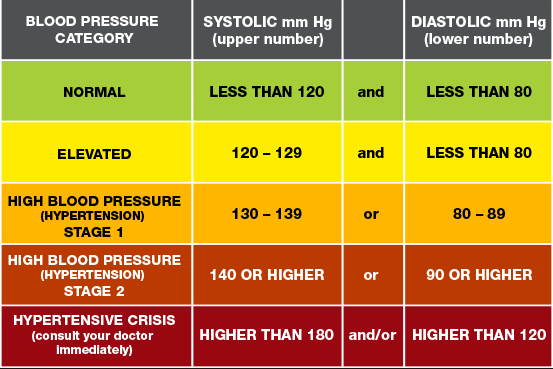

In [65]:
# Higher chance of coronary heart disease is more between age of 55 to 65
# More the number of cigarettes per day higher is the chance for  coronary heart disease
# Total cholesterol above 240 is dangerous and there a higher chnace for coronary heart disease
# Systolic blood pressure above 140 is high blood pressure and chnaces of coronary heart disease is more
# Diastolic blood pressure  above 80-90 is high blood pressure and chnaces of coronary heart disease is more
# BMI above 25 is overweight and there is higher chnace for  coronary heart disease 

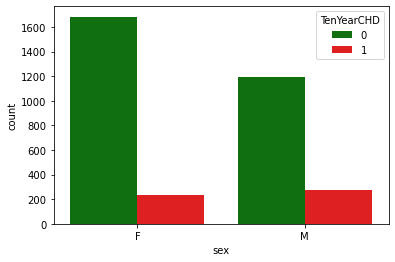

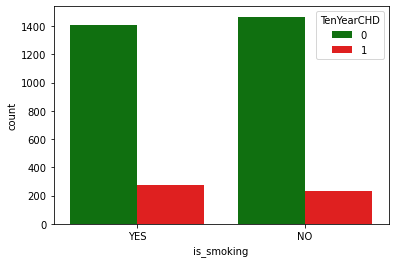

In [66]:
for i in df_object.columns:
    sns.countplot(data=df,x =df_object[i],hue='TenYearCHD' )
    plt.show()


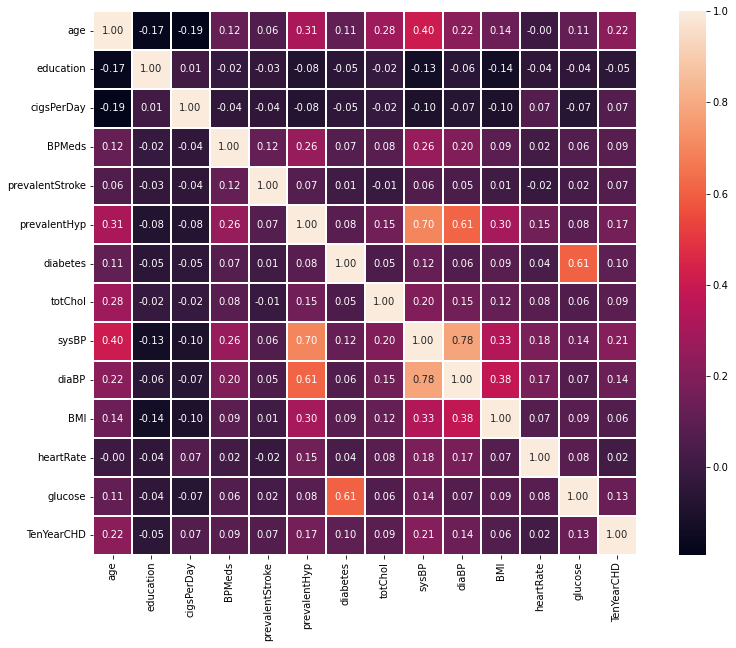

In [67]:
# Checking correlation between the data 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=.05,square=True)
plt.show()

In [68]:
#there us high coorelation between systolic blood pressure and diastolic blood pressure (0.78)
#Systolic blood pressure is coorelated whether or not the patient was  hypertensive (0.70)

### Data encoding

In [69]:
#For features with binary values are encoding using Label encoder
le =LabelEncoder()

In [70]:
df['sex']= le.fit_transform(df['sex'])
df['is_smoking']= le.fit_transform(df['is_smoking'])

In [71]:
df.head(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,61,1.0,1,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,36,4.0,1,1,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,41,2.0,0,1,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,55,2.0,0,0,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,75.0,0


### Data Balance and Over sampling 

In [72]:
#Checking the dependent variable risk of coronary heart disease CHD 
#Risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) 

In [73]:
#CHD Yes 
len(df[df['TenYearCHD']==1])/len(df['TenYearCHD'])*100

15.053128689492326

In [74]:
#CHD  No
len(df[df['TenYearCHD']==0])/len(df['TenYearCHD'])*100

84.94687131050767

In [75]:
#Data is highly imbalaced 

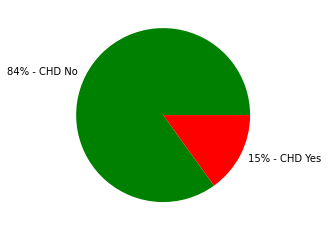

In [76]:
plt.pie(df['TenYearCHD'].value_counts()/len(df)*100,labels=['84% - CHD No','15% - CHD Yes'])
plt.show()

In [77]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [78]:
 #Data balancing using SMOTE
smote = SMOTE(sampling_strategy=0.7)
x_res,y_res =smote.fit_resample(X,y)

In [79]:
print(X.shape,y.shape,x_res.shape,y_res.shape)

(3388, 15) (3388,) (4892, 15) (4892,)


In [80]:
print(y.value_counts())

0    2878
1     510
Name: TenYearCHD, dtype: int64


In [81]:
print(y_res.value_counts())

0    2878
1    2014
Name: TenYearCHD, dtype: int64


In [82]:
y_res.value_counts()/y_res.shape[0]*100

0    58.830744
1    41.169256
Name: TenYearCHD, dtype: float64

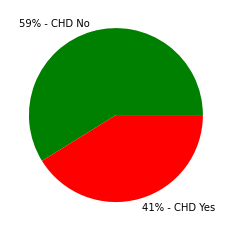

In [83]:
#now data is balanced
plt.pie(y_res.value_counts()/len(y_res)*100,labels=['59% - CHD No','41% - CHD Yes'])
plt.show()

In [84]:
#Splitting the data to test and train

In [85]:
x_train,x_test,y_train,y_test =train_test_split(x_res,y_res,random_state=10,test_size=0.2)

In [86]:
x_train.shape

(3913, 15)

In [87]:
x_test.shape

(979, 15)

### Feature scaling

In [88]:
std =StandardScaler()

In [89]:
x_train_scl = std.fit_transform(x_train)
x_test_scl = std.transform(x_test)

In [90]:
print(x_train_scl.shape)
print(x_test_scl.shape)

(3913, 15)
(979, 15)


In [91]:
x_train = pd.DataFrame(data=x_train_scl,columns=(x_train.columns))
x_test = pd.DataFrame(data=x_test_scl,columns=(x_test.columns))

In [92]:
x_train.shape,x_test.shape

((3913, 15), (979, 15))

## Machine learning Model building

In [93]:
#1. Logistic regression 
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_train_predict_lr = lr.predict(x_train)
y_test_predict_lr = lr.predict(x_test)
print(classification_report(y_train,y_train_predict_lr))
print(classification_report(y_test,y_test_predict_lr))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      2303
           1       0.64      0.51      0.57      1610

    accuracy                           0.68      3913
   macro avg       0.67      0.66      0.66      3913
weighted avg       0.68      0.68      0.68      3913

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       575
           1       0.63      0.50      0.56       404

    accuracy                           0.68       979
   macro avg       0.66      0.65      0.65       979
weighted avg       0.67      0.68      0.67       979



In [94]:
#2. KNN

knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
y_train_predict_knn = knn.predict(x_train)
y_test_predict_knn = knn.predict(x_test)
print(classification_report(y_train,y_train_predict_knn))
print(classification_report(y_test,y_test_predict_knn))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2303
           1       0.77      0.89      0.82      1610

    accuracy                           0.84      3913
   macro avg       0.84      0.85      0.84      3913
weighted avg       0.85      0.84      0.84      3913

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       575
           1       0.67      0.80      0.73       404

    accuracy                           0.75       979
   macro avg       0.75      0.76      0.75       979
weighted avg       0.77      0.75      0.76       979



In [95]:
#3 . Naive bayes 

nvb =BernoulliNB()
nvb.fit(x_train,y_train)
y_train_predict_nvb = nvb.predict(x_train)
y_test_predict_nvb = nvb.predict(x_test)
print(classification_report(y_train,y_train_predict_nvb))
print(classification_report(y_test,y_test_predict_nvb))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      2303
           1       0.57      0.52      0.55      1610

    accuracy                           0.64      3913
   macro avg       0.63      0.62      0.63      3913
weighted avg       0.64      0.64      0.64      3913

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       575
           1       0.58      0.52      0.55       404

    accuracy                           0.64       979
   macro avg       0.63      0.63      0.63       979
weighted avg       0.64      0.64      0.64       979



In [96]:
#4. Support vector

svm =SVC()
svm.fit(x_train,y_train)

y_train_predict_svm = svm.predict(x_train)
y_test_predict_svm = svm.predict(x_test)
print(classification_report(y_train,y_train_predict_svm))
print(classification_report(y_test,y_test_predict_svm))


              precision    recall  f1-score   support

           0       0.75      0.87      0.81      2303
           1       0.76      0.59      0.67      1610

    accuracy                           0.76      3913
   macro avg       0.76      0.73      0.74      3913
weighted avg       0.76      0.76      0.75      3913

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       575
           1       0.74      0.56      0.64       404

    accuracy                           0.74       979
   macro avg       0.74      0.71      0.72       979
weighted avg       0.74      0.74      0.73       979



In [97]:
#5. Decision Tree

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_train_predict_dt = dt.predict(x_train)
y_test_predict_dt = dt.predict(x_test)
print(classification_report(y_train,y_train_predict_dt))
print(classification_report(y_test,y_test_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303
           1       1.00      1.00      1.00      1610

    accuracy                           1.00      3913
   macro avg       1.00      1.00      1.00      3913
weighted avg       1.00      1.00      1.00      3913

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       575
           1       0.74      0.77      0.75       404

    accuracy                           0.79       979
   macro avg       0.78      0.79      0.79       979
weighted avg       0.79      0.79      0.79       979



In [98]:
#6 Random forest 
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_train_predict_rfc = rfc.predict(x_train)
y_test_predict_rfc = rfc.predict(x_test)
print(classification_report(y_train,y_train_predict_rfc))
print(classification_report(y_test,y_test_predict_rfc))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303
           1       1.00      1.00      1.00      1610

    accuracy                           1.00      3913
   macro avg       1.00      1.00      1.00      3913
weighted avg       1.00      1.00      1.00      3913

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       575
           1       0.92      0.79      0.85       404

    accuracy                           0.89       979
   macro avg       0.89      0.87      0.88       979
weighted avg       0.89      0.89      0.88       979



In [99]:
#7 Adaboost classifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_train_predict_abc = abc.predict(x_train)
y_test_predict_abc = abc.predict(x_test)
print(classification_report(y_train,y_train_predict_abc))
print(classification_report(y_test,y_test_predict_abc))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2303
           1       0.86      0.68      0.76      1610

    accuracy                           0.82      3913
   macro avg       0.83      0.80      0.81      3913
weighted avg       0.83      0.82      0.82      3913

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       575
           1       0.83      0.68      0.75       404

    accuracy                           0.81       979
   macro avg       0.82      0.79      0.80       979
weighted avg       0.81      0.81      0.81       979



In [100]:
#8 XGBClassifier
xgb  = XGBClassifier()
xgb.fit(x_train,y_train)
y_train_predict_xgb = xgb.predict(x_train)
y_test_predict_xgb = xgb.predict(x_test)
print(classification_report(y_train,y_train_predict_xgb))
print(classification_report(y_test,y_test_predict_xgb))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2303
           1       1.00      0.99      0.99      1610

    accuracy                           0.99      3913
   macro avg       1.00      0.99      0.99      3913
weighted avg       0.99      0.99      0.99      3913

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       575
           1       0.90      0.80      0.85       404

    accuracy                           0.88       979
   macro avg       0.89      0.87      0.88       979
weighted avg       0.88      0.88      0.88       979



In [101]:
# Summary of accuracy scores

data={'Model': ['Logistic regression','KNN','Naive bayes','Support vector','Decision Tree','Random forest','Adaboost classifier','XGBClassifier'],
      'Accuracy score' : [accuracy_score(y_test,y_test_predict_lr),
               accuracy_score(y_test,y_test_predict_knn),
               accuracy_score(y_test,y_test_predict_nvb),
               accuracy_score(y_test,y_test_predict_svm),
               accuracy_score(y_test,y_test_predict_dt),
               accuracy_score(y_test,y_test_predict_rfc),
               accuracy_score(y_test,y_test_predict_abc),
               accuracy_score(y_test,y_test_predict_xgb)
              ]
     }

summary = pd.DataFrame(data)
summary

,Model,Accuracy score
0,Logistic regression,0.675179
1,KNN,0.753830
2,Naive bayes,0.644535
3,Support vector,0.737487
4,Decision Tree,0.790603
5,Random forest,0.885598
6,Adaboost classifier,0.812053
7,XGBClassifier,0.881512


In [102]:
#Random forest classifier model giving best accuracy

In [103]:
#Checking cross validation score for random forest classifier


In [104]:
#10 fold cross validation 
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(rfc,x_res,y_res,cv=10)))

0.8921230332623846


In [105]:
rfc_1 = RandomForestClassifier()
param = dict(n_estimators= [50,150,200,250,300],
             criterion=['gini','entropy'],
             max_depth=[20,25,30,35],
             min_samples_split= [2,3,4],
            min_samples_leaf= [1,2,3,4])
grcv = GridSearchCV(rfc_1,param,cv=10,n_jobs=-1)

In [106]:
grcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 150, 200, 250, 300]})

In [107]:
grcv.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [108]:
y_test_pred_grcv = grcv.predict(x_test)

In [109]:
accuracy_score(y_test,y_test_pred_grcv)

0.8937691521961185

In [121]:
print(classification_report(y_test,y_test_pred_grcv))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       575
           1       0.91      0.83      0.87       404

    accuracy                           0.89       979
   macro avg       0.90      0.88      0.89       979
weighted avg       0.89      0.89      0.89       979



In [112]:
#Out of all models random forest giving the  best performance 

### Model evaluation 

In [113]:
#Confusion matrix

In [114]:
con_matrix = confusion_matrix(y_test,y_test_predict_rfc)
con_matrix

array([[546,  29],
       [ 83, 321]], dtype=int64)

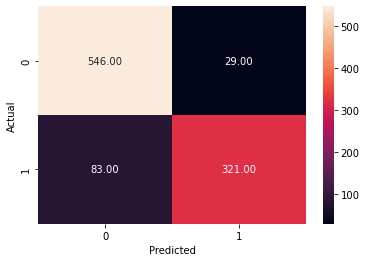

In [115]:
sns.heatmap(con_matrix,annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [116]:
print(classification_report(y_test,y_test_predict_rfc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       575
           1       0.92      0.79      0.85       404

    accuracy                           0.89       979
   macro avg       0.89      0.87      0.88       979
weighted avg       0.89      0.89      0.88       979



In [117]:
y_test_predict_rfc_parab =rfc.predict_proba(x_test)
y_test_predict_rfc_parab = y_test_predict_rfc_parab[:,1]

In [118]:
fpr,tpr,_ = roc_curve(y_test,y_test_predict_rfc_parab)

In [119]:
auc_score  = roc_auc_score(y_test,y_test_predict_rfc_parab)
auc_score

0.9510589754627636

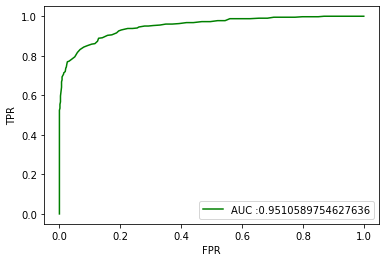

In [120]:
plt.plot(fpr,tpr,label = "AUC :"+str(auc_score))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

### *** END ***